# Developing an AI for Hand Gesture Recognition

You are working for a gaming company developing interactive AI-powered games. Your task is to create a hand gesture recognition model to play a game of Rock, Paper, Scissors against human players. The model should be accurate and able to predict gestures from images in real-time.

The Rock, Paper, Scissors dataset, available in TensorFlow Datasets, contains RGB images of hands showing rock, paper, and scissors gestures. Your goal is to create a model using transfer learning and test its real-time application potential.

In [1]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.1CBVI3_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.1CBVI3_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.
Dataset Info: tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rp

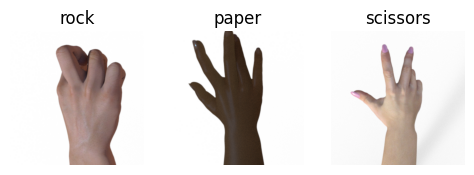

In [2]:
# Load Rock, Paper, Scissors Dataset
dataset, info = tfds.load('rock_paper_scissors', as_supervised=True, with_info=True)

# Split Dataset into Train and Test
train_dataset = dataset['train']
test_dataset = dataset['test']

# Print Dataset Information
print("Dataset Info:", info)
print(f"Number of training examples: {info.splits['train'].num_examples}")
print(f"Number of test examples: {info.splits['test'].num_examples}")
print("Classes:", info.features['label'].names)

# Visualize Sample Images
plt.figure(figsize=(10, 5))
for example in train_dataset.take(10):
    image, label = example
    plt.subplot(2, 5, label.numpy() + 1)
    plt.imshow(image)
    plt.title(info.features['label'].names[label.numpy()])
    plt.axis('off')
plt.show()

In [3]:
#Step 1: Load & Explore Dataset
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (Rock, Paper, Scissors)
dataset, info = tfds.load('rock_paper_scissors', as_supervised=True, with_info=True)

# Split into training & testing sets
train_dataset = dataset['train']
test_dataset = dataset['test']

# Explore dataset
print("Dataset Info:", info)
print("Classes:", info.features['label'].names)
print(f"Training Samples: {info.splits['train'].num_examples}")
print(f"Test Samples: {info.splits['test'].num_examples}")


Dataset Info: tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir='/root/tensorflow_datasets/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemo

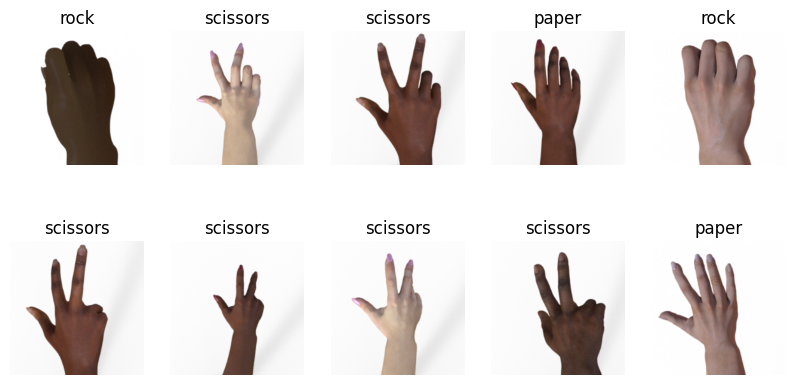

In [4]:
#Step 2: Data Preprocessing & Augmentation
# Define preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize to match MobileNetV2 input shape
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values
    return image, label

# Apply preprocessing correctly **before batching**
train_dataset = train_dataset.map(preprocess).shuffle(1000).batch(32)
test_dataset = test_dataset.map(preprocess).batch(32)

# Display sample images
plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(train_dataset.unbatch().take(10)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image.numpy())
    plt.title(info.features['label'].names[label.numpy()])
    plt.axis('off')

plt.show()


In [5]:
#Step 3: Implement Transfer Learning with MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load MobileNetV2 without top layers
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base layers

# Build custom model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Reduce output complexity
    Dropout(0.3),  # Prevent overfitting
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes (Rock, Paper, Scissors)
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 34s 271ms/step - accuracy: 0.8209 - loss: 0.4090 - val_accuracy: 0.9462 - val_loss: 0.1541
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.9974 - loss: 0.0113 - val_accuracy: 0.9651 - val_loss: 0.1268
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.9677 - val_loss: 0.1110
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9986 - loss: 0.0038 - val_accuracy: 0.9113 - val_loss: 0.2217
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9220 - val_loss: 0.1731
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9409 - val_loss: 0.1491
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 1.0000 - loss: 9.6533e-04 - val_accuracy: 0.9677 - val_loss: 0.1021
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - acc

In [6]:
#Step 4: Fine-Tuning MobileNetV2 for Better Accuracy
# Unfreeze last layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:100]:  # Keep early layers frozen
    layer.trainable = False

# Recompile model with lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_fine = model.fit(train_dataset, validation_data=test_dataset, epochs=5)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 39s 232ms/step - accuracy: 0.9597 - loss: 0.1338 - val_accuracy: 0.8952 - val_loss: 0.4809
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 1.0000 - loss: 4.8903e-04 - val_accuracy: 0.8844 - val_loss: 0.6744
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 1.0000 - loss: 9.4297e-05 - val_accuracy: 0.8817 - val_loss: 0.6720
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9086 - val_loss: 0.2740
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9993 - loss: 0.0013 - val_accuracy: 0.8790 - val_loss: 1.4872


In [7]:
#Step 5: Evaluate Model Performance
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions
y_true = []
y_pred = []
for images, labels in test_dataset:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))  # Convert probabilities to class index
    y_true.extend(labels.numpy())

# Convert lists to NumPy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Print Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.85       124
           1       1.00      0.64      0.78       124
           2       1.00      1.00      1.00       124

    accuracy                           0.88       372
   macro avg       0.91      0.88      0.87       372
weighted avg       0.91      0.88      0.87       372

Confusion Matrix:
 [[124   0   0]
 [ 45  79   0]
 [  0   0 124]]


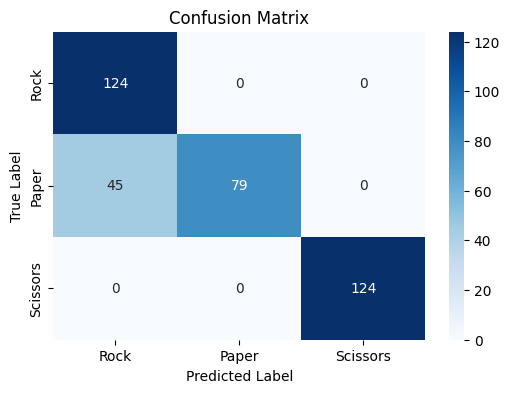

In [8]:
#Step 6: Visualizing Confusion Matrix
import seaborn as sns

# Define class labels
class_names = ['Rock', 'Paper', 'Scissors']

# Create Confusion Matrix Plot
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [10]:


from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Best hyperparameters found from tuning
best_lr = 0.0001
best_batch = 32
best_epochs = 10

# Load fine-tuned MobileNetV2 model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = True
for layer in base_model.layers[:100]:  # Keep early layers frozen
    layer.trainable = False

# Build final model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 classes
])

# Compile model with optimized hyperparameters
model.compile(
    optimizer=Adam(learning_rate=best_lr),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history_final = model.fit(
    train_dataset,  # ✅ REMOVE `.batch()` if dataset is already batched
    validation_data=test_dataset,
    epochs=best_epochs
)


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 229ms/step - accuracy: 0.8724 - loss: 0.3127 - val_accuracy: 0.3817 - val_loss: 2.2857
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.4489 - val_loss: 2.0473
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 1.0000 - loss: 6.7459e-04 - val_accuracy: 0.5188 - val_loss: 1.7800
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 1.0000 - loss: 7.0514e-04 - val_accuracy: 0.6371 - val_loss: 1.4896
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 1.0000 - loss: 5.9530e-04 - val_accuracy: 0.6586 - val_loss: 1.1840
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 1.0000 - loss: 2.1784e-04 - val_accuracy: 0.6801 - val_loss: 1.0181
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 1.0000 - loss: 1.4067e-04 - val_accuracy: 0.7097 - val_loss: 0.8582
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 1.0000 - loss: 1.1204e-04 

In [11]:
#Step 8: Save Model for Future Use
# Save trained model
model.save('final_rps_model.h5')
print("✅ Model saved successfully!")


✅ Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


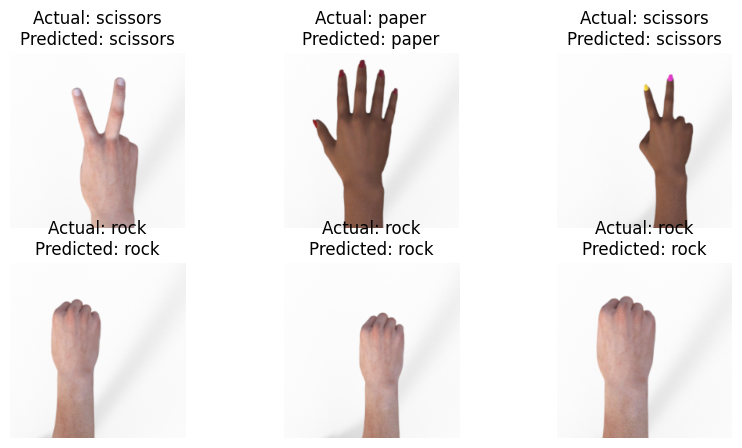

In [15]:
import numpy as np

# Get a batch of test images
test_images, test_labels = next(iter(test_dataset))

# Make predictions
predictions = model.predict(test_images)

# Display images with predicted vs actual labels
plt.figure(figsize=(10, 5))
for i in range(6):  # Show first 6 test images
    plt.subplot(2, 3, i + 1)
    plt.imshow(test_images[i])
    predicted_label = np.argmax(predictions[i])
    actual_label = test_labels[i].numpy()
    plt.title(f"Actual: {info.features['label'].names[actual_label]}\nPredicted: {info.features['label'].names[predicted_label]}")
    plt.axis("off")

plt.show()



In [16]:
import numpy as np

# Get a batch of test images
test_images, test_labels = next(iter(test_dataset))

# Make predictions
predictions = model.predict(test_images)

# Show results
for i in range(5):  # Show first 5 predictions
    predicted_label = np.argmax(predictions[i])
    actual_label = test_labels[i].numpy()
    print(f"Actual: {info.features['label'].names[actual_label]}, Predicted: {info.features['label'].names[predicted_label]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Actual: scissors, Predicted: scissors
Actual: paper, Predicted: paper
Actual: scissors, Predicted: scissors
Actual: rock, Predicted: rock
Actual: rock, Predicted: rock


In [17]:
#Step 7: Convert Model for Deployment
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the converted model
with open("rock_paper_scissors_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model converted and saved as TensorFlow Lite!")

Saved artifact at '/tmp/tmp7aubq6k0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_474')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  132351735758096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351735755408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351735755792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351735755600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351735756752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351735754256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351735754640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351735752144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351735752336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132351735755024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1323517357

In [18]:
import tensorflow as tf

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="rock_paper_scissors_model.tflite")
interpreter.allocate_tensors()

# Print model details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(f"Model Input: {input_details}")
print(f"Model Output: {output_details}")

Model Input: [{'name': 'serving_default_keras_tensor_474:0', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Model Output: [{'name': 'StatefulPartitionedCall_1:0', 'index': 175, 'shape': array([1, 3], dtype=int32), 'shape_signature': array([-1,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [19]:
#Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8382 - loss: 0.6574
Test Accuracy: 83.60%


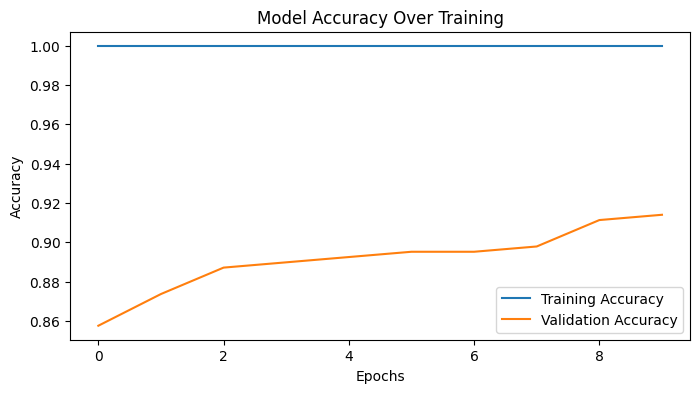

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy over epochs
plt.figure(figsize=(8, 4))
plt.plot(train_accuracy, label="Training Accuracy")
plt.plot(val_accuracy, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Training")
plt.legend()
plt.show()
